In [1]:
from PMF.ProbabilisticMatrixFactorization import PMF
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'data\ml-latest-small\ml-latest-small\ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
triain, test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
params = {
    "num_feat": 50, 
    "epsilon": 1, 
    "_lambda": 0.1, 
    "momentum": 0.8, 
    "maxepoch": 10, 
    "num_batches": 100,
    "batch_size": 1000
}
pmf = PMF()
pmf.set_params(parameters=params)

In [5]:
pmf.fit(triain.values, test.values)

Epoch 1 |  Training RMSE: 1.061414, Test RMSE 1.050090
Epoch 2 |  Training RMSE: 1.052515, Test RMSE 1.048889
Epoch 3 |  Training RMSE: 1.041015, Test RMSE 1.045646
Epoch 4 |  Training RMSE: 1.022206, Test RMSE 1.037306
Epoch 5 |  Training RMSE: 0.990950, Test RMSE 1.020481
Epoch 6 |  Training RMSE: 0.948630, Test RMSE 0.996457
Epoch 7 |  Training RMSE: 0.905549, Test RMSE 0.973737
Epoch 8 |  Training RMSE: 0.867417, Test RMSE 0.956142
Epoch 9 |  Training RMSE: 0.834448, Test RMSE 0.943296
Epoch 10 |  Training RMSE: 0.805044, Test RMSE 0.933386


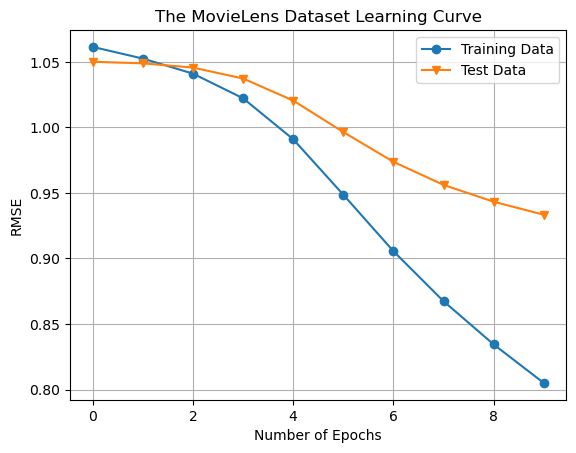

In [6]:
# Check performance by plotting train and test errors
plt.plot(range(pmf.epoch), pmf.rmse_train, marker='o', label='Training Data')
plt.plot(range(pmf.epoch), pmf.rmse_test, marker='v', label='Test Data')
plt.title('The MovieLens Dataset Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()


## Evaluation

In [ ]:
unique_users = data['userId'].unique()
prediction = {}
for user in unique_users:
    prediction[user] = pmf.predict(user)
y_pred = test.apply(lambda x: prediction[x.iloc[0]][x.iloc[1]], axis=1)
y_true = test['rating']

### Rating Prediction Metrics

In [8]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f'RMSE: {rmse:.4f} | MAE: {mae:.4f}')

RMSE: 0.9334 | MAE: 0.7231


### Ranking Metrics

#### Precision & Recall

In [9]:
k_values = [1, 5, 10, 20, 50, 100]
performances = pd.DataFrame(columns=['Precision', 'Recall'], index=k_values)
for k in k_values:
    performances.loc[k] = pmf.topK(test.values, k=k)
print(performances)

    Precision    Recall
1     0.05082  0.003568
5    0.048852    0.0133
10   0.049016  0.026556
20   0.045328  0.046507
50   0.038426  0.089071
100  0.029475   0.13353


In [ ]:
pmf.save_model('model/pmf_model.npz')